In [6]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

def scale_image(image, scale_factor):
    return cv2.resize(image, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)

def flip_image(image):
    return cv2.flip(image, 1)  # Horizontal flip

def translate_and_crop_image(image, x, y):
    rows, cols = image.shape[:2]
    M = np.float32([[1, 0, x], [0, 1, y]])
    translated = cv2.warpAffine(image, M, (cols, rows))
    
    # Crop the image to remove black areas
    x_crop = int(abs(x))
    y_crop = int(abs(y))
    cropped = translated[y_crop:rows-y_crop, x_crop:cols-x_crop]
    
    # Resize back to original dimensions
    return cv2.resize(cropped, (cols, rows), interpolation=cv2.INTER_LINEAR)

def perspective_transform(image, scale):
    rows, cols = image.shape[:2]
    src_points = np.float32([[0, 0], [cols - 1, 0], [cols - 1, rows - 1], [0, rows - 1]])
    dst_points = np.float32([[0 + scale, 0 + scale], 
                             [cols - 1 - scale, 0 + scale], 
                             [cols - 1 - scale, rows - 1 - scale], 
                             [0 + scale, rows - 1 - scale]])
    M = cv2.getPerspectiveTransform(src_points, dst_points)
    return cv2.warpPerspective(image, M, (cols, rows))

def apply_random_augmentation(image):
    # Random scaling (0.9 to 1.1)
    scale_factor = random.uniform(0.9, 1.1)
    image = scale_image(image, scale_factor)
    
    # Random flipping (50% chance)
    if random.random() > 0.5:
        image = flip_image(image)
    
    # Random translation (-5% to 5% of image dimensions)
    rows, cols = image.shape[:2]
    tx = random.uniform(-0.05, 0.05) * cols
    ty = random.uniform(-0.05, 0.05) * rows
    image = translate_and_crop_image(image, tx, ty)
    
    # Random perspective transform (0 to 3% of image dimensions)
    perspective_scale = random.uniform(0, 0.03) * min(rows, cols)
    image = perspective_transform(image, perspective_scale)
    
    return image

def generate_and_display_augmented_images(image, num_images=3, figsize=(50, 10)):
    augmented_images = [image] + [apply_random_augmentation(image.copy()) for _ in range(num_images)]
    
    fig, axes = plt.subplots(1, num_images + 1, figsize=figsize)
    fig.suptitle("Original and Augmented Images", fontsize=16)
    
    for i, img in enumerate(augmented_images):
        if img.shape[2] == 3:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title("Original" if i == 0 else f"Augmented {i}")
    
    plt.tight_layout()
    plt.show()

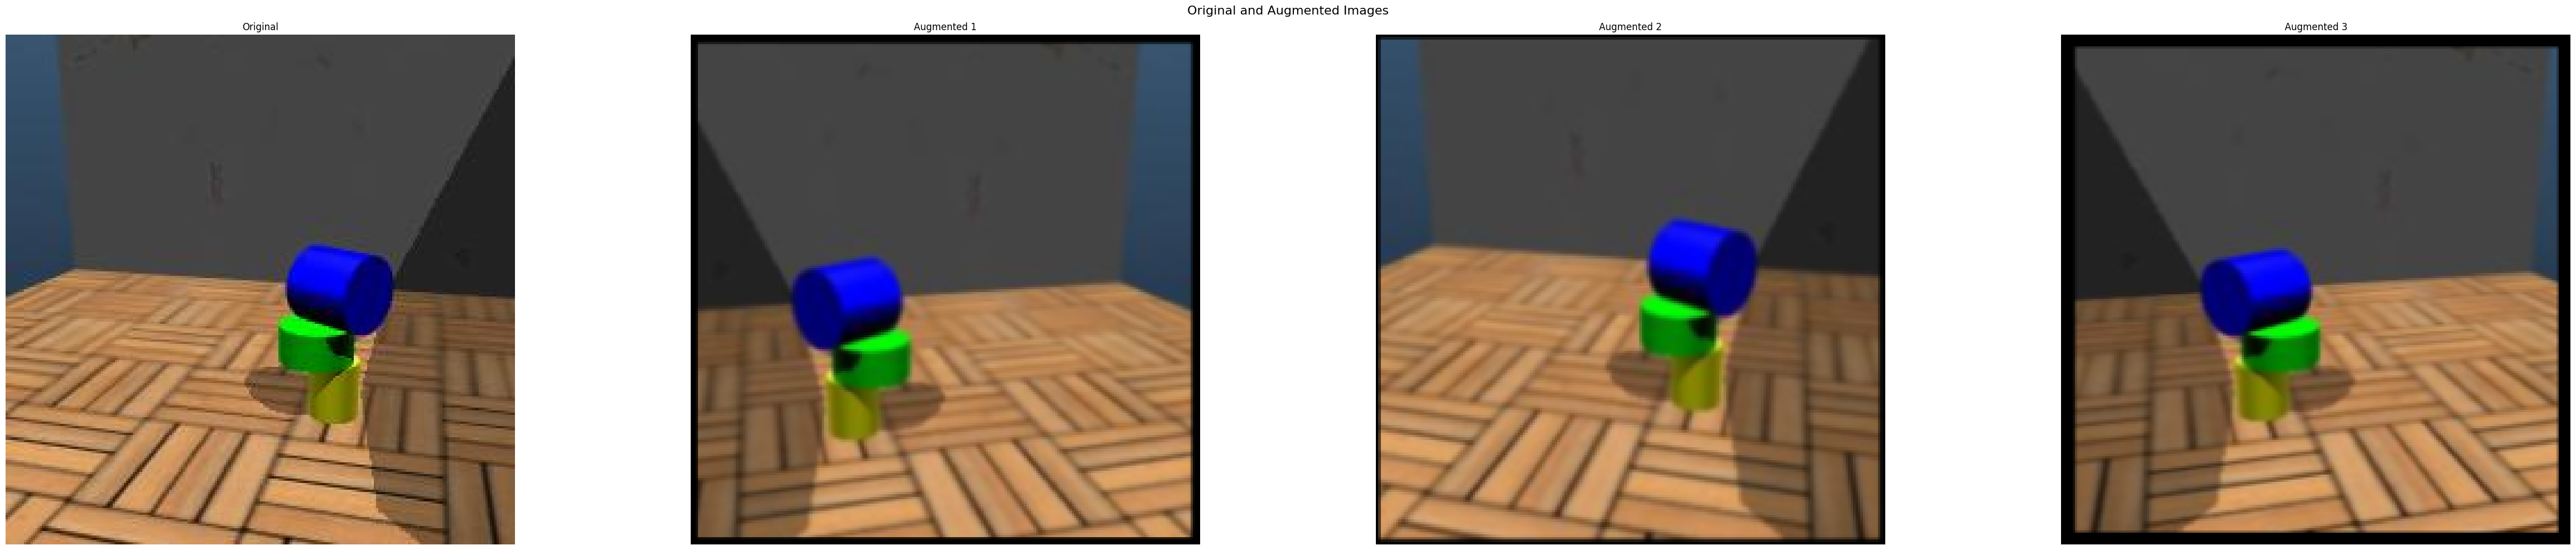

In [7]:
dir = './COMP90086_2024_Project_train/train'
img = cv2.imread(dir + "/54.jpg")

generate_and_display_augmented_images(img, 3)